**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [7]:
import pandas as pd
frame = pd.read_csv('D:\CSV\Adverse.csv')
frame['1234567890qwerty'] = [True]*200
frame

,TV,Radio,Newspaper,Sales,1234567890qwerty
1,230.1,37.8,69.2,22.1,True
2,44.5,39.3,45.1,10.4,True
3,17.2,45.9,69.3,9.3,True
4,151.5,41.3,58.5,18.5,True
5,180.8,10.8,58.4,12.9,True
...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,True
197,94.2,4.9,8.1,9.7,True
198,177.0,9.3,6.4,12.8,True
199,283.6,42.0,66.2,25.5,True


**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [5]:
# Ваш код здесь
frame.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Ваш код здесь
import seaborn as sn
sn.pairplot(frame, height = 3, aspect = 1.2)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = frame[['TV','Radio','Newspaper']].values # Ваш код здесь
y = frame[['Sales']].values # Ваш код здесь
print (X[0:10])
print (y[0:10])
print (type(y))

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]
[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]]
<class 'numpy.ndarray'>


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
means, stds = X.mean(axis = 0), X.std(axis = 0)  # Ваш код здесь

In [7]:
print (means)
print (stds)

[147.0425  23.264   30.554 ]
[85.63933176 14.80964564 21.72410606]


In [8]:
X = (X - means)/stds# Ваш код здесь
X[0:10]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865],
       [ 0.05204968,  1.21785493,  1.28640506],
       [ 0.3941822 , -0.84161366,  1.28180188],
       [-1.61540845,  1.73103399,  2.04592999],
       [-1.04557682,  0.64390467, -0.32470841],
       [-0.31343659, -0.24740632, -0.87248699],
       [-1.61657614, -1.42906863, -1.36042422],
       [ 0.61604287, -1.39530685, -0.43058158]])

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [9]:
import numpy as np
print (X.shape)
X_append = np.ones((200,1))
X = np.hstack((X,X_append))
X[0:10]

(200, 3)


array([[ 0.96985227,  0.98152247,  1.77894547,  1.        ],
       [-1.19737623,  1.08280781,  0.66957876,  1.        ],
       [-1.51615499,  1.52846331,  1.78354865,  1.        ],
       [ 0.05204968,  1.21785493,  1.28640506,  1.        ],
       [ 0.3941822 , -0.84161366,  1.28180188,  1.        ],
       [-1.61540845,  1.73103399,  2.04592999,  1.        ],
       [-1.04557682,  0.64390467, -0.32470841,  1.        ],
       [-0.31343659, -0.24740632, -0.87248699,  1.        ],
       [-1.61657614, -1.42906863, -1.36042422,  1.        ],
       [ 0.61604287, -1.39530685, -0.43058158,  1.        ]])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [10]:
def mserror(y, y_pred):
    n = 200.    
    return ((1./n)*sum((y - y_pred)**2))    

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [11]:
frame.Sales.median()

12.9

In [12]:
answer1 = mserror(frame.Sales, frame.Sales.median())
answer_1_new = round(answer1, 3)# Ваш код здесь
print(answer_1_new)

28.346


In [13]:
file_obj = open('D:\Coursera\Task_2.txt', 'w')
string = '28.346'
file_obj.write(string)
file_obj.close()


In [14]:
file_obj = open('D:\Coursera\Task_1.txt', 'r')
print (file_obj.read())

28.346


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [15]:
def normal_equation(X, y):
    XT = X.T
    XTX = np.dot(XT,X)
    XTX_1 = np.linalg.inv(XTX)
    XTX_1XT = np.dot(XTX_1,XT)
    return np.dot(XTX_1XT,y)  # Ваш код здесь

In [16]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)
print (norm_eq_weights[2][0])
print (means[0])

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]
-0.02253860888873116
147.0425


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [17]:
answer2 = (norm_eq_weights[0][0] + norm_eq_weights[1][0] + norm_eq_weights[2][0])*0 + norm_eq_weights[3][0] # Ваш код здесь
print(round(answer2, 3))

14.022


In [18]:
file_obj = open('D:\Coursera\Task_2.txt', 'w')
string = '14.022'
file_obj.write(string)
file_obj.close()


In [19]:
file_obj = open('D:\Coursera\Task_2.txt', 'r')
print (file_obj.read())

14.022


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [20]:
def linear_pred(X, w):
    return np.dot(X,w)

In [21]:
linear_pred(X, np.array([[1],[1],[1],[1]]))[0:10]

array([[ 4.73032021],
       [ 1.55501034],
       [ 2.79585697],
       [ 3.55630968],
       [ 1.83437042],
       [ 3.16155553],
       [ 0.27361944],
       [-0.43332991],
       [-3.40606898],
       [-0.20984556]])

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [22]:
n = 200.
answer3 = mserror(y,linear_pred(X,norm_eq_weights))
print(round(answer3[0], 3))

2.784


In [23]:
file_obj = open('D:\Coursera\Task_3.txt', 'w')
string = '2.784'
file_obj.write(string)
file_obj.close()

In [24]:
file_obj = open('D:\Coursera\Task_3.txt', 'r')
print (file_obj.read())

2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

#### Создаю функцию linear_prediction_shape, которая на вход принимает веса и строчку исходного датасета (не весь датасет, т.к мы работает со стохастическиим градиентным методом

In [25]:
def linear_prediction_shape(X, w, train_ind):
    func = w[0]*X[train_ind][0] + w[1]*X[train_ind][1] + w[2]*X[train_ind][2] + w[3]*X[train_ind][3]
    return func

In [26]:
linear_prediction_shape(X, norm_eq_weights, train_ind = 100) - y[100]

array([2.17595844])

In [27]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    n = 200.
    y_pred = linear_prediction_shape(X, w, train_ind)
    grad0 = (2./n)*X[train_ind][0]*(y_pred - y[train_ind])  # Ваш код здесь
    grad1 = (2./n)*X[train_ind][1]*(y_pred - y[train_ind])# Ваш код здесь
    grad2 = (2./n)*X[train_ind][2]*(y_pred - y[train_ind])# Ваш код здесь
    grad3 = (2./n)*(y_pred - y[train_ind])# Ваш код здесь
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [28]:
stochastic_gradient_step(X,y, w = np.array([[1],[1],[1],[1]]), train_ind = 20, eta=0.01)

array([[1.00123448],
       [1.00044378],
       [1.00155807],
       [1.00148156]])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- min_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [40]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        new_omegi = stochastic_gradient_step(X, y, w, train_ind = random_ind, eta=1e-2)
        error = mserror(y, linear_pred(X,w))
        errors.append(error)
        
        weight_dist = np.linalg.norm(w - new_omegi)
        w = new_omegi
        
        iter_num +=1
    print (weight_dist)
        # Ваш код здесь
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [41]:
%%time
w_init = np.array([[0],[0],[0],[0]])
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1000000,
                                min_weight_dist=1e-8, seed=42, verbose=False)# Ваш код здесь

5.0536343368235184e-09
Wall time: 5.55 s


In [42]:
print (stoch_grad_desc_weights)
print (stoch_errors_by_iter[0:10])

[[ 3.91069256e+00]
 [ 2.78209808e+00]
 [-8.10462217e-03]
 [ 1.40190566e+01]]
[223.71625, 223.66538899863158, 223.63640485031922, 223.55491009541456, 223.4807624515579, 223.47256426508545, 223.44655231890474, 223.39175144920213, 223.3214521757322, 223.27074621459082]


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


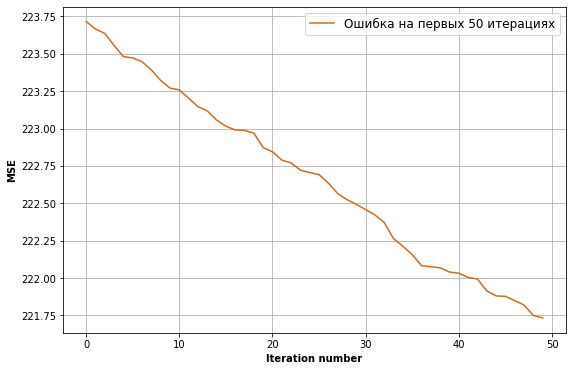

In [57]:
%pylab inline
figure(figsize = (9,6))
plot(range(50), stoch_errors_by_iter[:50], label = 'Ошибка на первых 50 итерациях', color = 'chocolate')
xlabel('Iteration number', fontweight = 'bold')
ylabel('MSE', fontweight = 'bold')
legend(fontsize = 12)
grid(True)

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


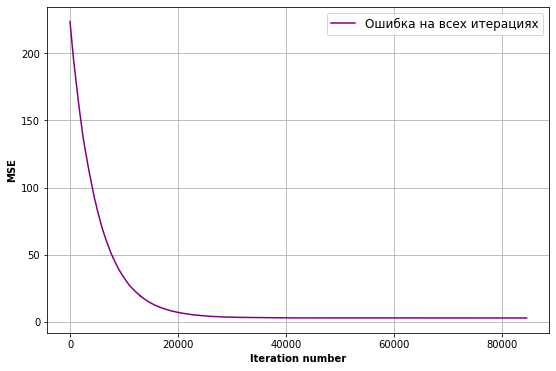

In [63]:
%pylab inline
figure(figsize = (9,6))
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter, label = 'Ошибка на всех итерациях', color = 'purple')
xlabel('Iteration number', fontweight = 'bold')
ylabel('MSE', fontweight = 'bold')
legend(fontsize = 12)
grid(True)

**Посмотрим на вектор весов, к которому сошелся метод.**

In [64]:
stoch_grad_desc_weights

array([[ 3.91069256e+00],
       [ 2.78209808e+00],
       [-8.10462217e-03],
       [ 1.40190566e+01]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [65]:
stoch_errors_by_iter[-1]

2.784412588352759

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [66]:
answer4 = mserror(y, linear_pred(X, stoch_grad_desc_weights)) # Ваш код здесь
print(round(answer4, 3))

2.784


In [67]:
file_obj = open('D:\Coursera\Task_4.txt', 'w')
string = '2.784'
file_obj.write(string)
file_obj.close()

In [68]:
file_obj = open('D:\Coursera\Task_4.txt', 'r')
print (file_obj.read())

2.784
